# Phonetics

The Pennsylvania State University

LING 497 Acoustic and Auditory Phonetics

2023 Spring with [Prof. Deborah Morton](https://deborahcmorton.wordpress.com/)

---

## Imports & Environment

In [3]:
import numpy                    as np
np.set_printoptions(suppress=True) # suppress scientific notation
import numpy.random             as npr
import pandas                   as pd

import matplotlib               as mpl
import matplotlib.pyplot        as plt
plt.rcParams['figure.figsize'] = (10, 6)

from   html.entities import codepoint2name
import string
import unicodedata

from   datetime import datetime as d
import locale                   as l
import platform                 as p
import sys                      as s

pad = 20
print(f"{'Executed'.upper():<{pad}}: {d.now()}")
print()
print(f"{'Platform'        :<{pad}}: "
      f"{p.mac_ver()[0]} | "
      f"{p.system()} | "
      f"{p.release()} | "
      f"{p.machine()}")
print(f"{''                :<{pad}}: {l.getpreferredencoding()}")
print()
print(f"{'Python'          :<{pad}}: {s.version}")
print(f"{''                :<{pad}}: {s.version_info}")
print(f"{''                :<{pad}}: {p.python_implementation()}")
print()
print(f"{'Matplotlib'      :<{pad}}: {mpl.__version__}")
print(f"{'NumPy'           :<{pad}}: { np.__version__}")
print(f"{'Pandas'          :<{pad}}: { pd.__version__}")

EXECUTED            : 2023-01-25 22:09:00.813938

Platform            : 13.1 | Darwin | 22.2.0 | arm64
                    : UTF-8

Python              : 3.10.8 | packaged by conda-forge | (main, Nov 22 2022, 08:25:13) [Clang 14.0.6 ]
                    : sys.version_info(major=3, minor=10, micro=8, releaselevel='final', serial=0)
                    : CPython

Matplotlib          : 3.6.3
NumPy               : 1.24.0
Pandas              : 1.5.2


---

## Auxiliary Code

In [21]:
def dec_to_hex (dec : int = 2**16 - 1) -> str:
  """ Compose the hexadecimal representation
      as a string
      of a nonnegative integer.
  
  params: int (dec)
  return: str
  """
  assert 0 <= dec, 'Try again with a nonnegative integer.'
  return format(dec, '>06x').upper()

def to_codepoint (hexa : str = '10FFFF') -> str:
  """ Compose a Unicode code point
      as a string.

  params: str (hexa)
  return: str
  """
  assert int(hexa, base=16) <= 0x10FFFF, 'Try again with a valid code point.'
  return fr'\U00{hexa}'

# Nonnegative integer no greater than 0x10FFFF (1_114_111)
dec_to_glyph = chr

def to_glyph (code_point : str = '\\u00FF') -> str:
  """ Convert a raw Unicode code point to its non raw (graphical) form.
  
  params: str (code_point)
  return: str
  """
  return code_point.encode('utf-8').decode('unicode-escape')

def print_code_point_information (points : str = 'hello world') -> None:
  """ Prints information about Unicode code points.
  
      Prints the sequence of code points
             the number of code points in the sequence
             the following information for each Unicode code point in a sequence of code points:
               * glyph
               * raw code point
               * hexadecimal repr
               * byte repr
               * Unicode category
               * Named entity repr
               * Unicode name

  params: str (points)
  return: None
  """
  #print(points)
  #print(len(points))
  print()
  print(f"{'Glyph':<10} "
        f"{'Code Point':<10} "
        f"{'Hex':<10} "
        f"{'Bytes':<20} "
        f"{'Category':<10} "
        f"{'Named Entity':<20} "
        f"{'Name':<10}")
  try:
    for point in points:
      hex_rep    = dec_to_hex(ord(point))
      code_point = to_codepoint(hex_rep)
      glyph      = to_glyph(code_point)
      unicode = (f"{chr(ord(point)):<10} "
                f"{code_point:<10} "
                f"{format(ord(point), '06x').upper():<10} "
                f"{str(point.encode('utf-8')):<20} "
                f"{unicodedata.category(chr(ord(point))):<10} ")
      try:
        unicode += f"{codepoint2name[ord(point)]:<20} "
      except KeyError as e:
        unicode += f"{'NO NAMED ENTITY':<20} "
      try:
        unicode += f"{unicodedata.name(point)}"
      except ValueError as e:
        unicode += f"NO UNICODE NAME"
      print(unicode)
  except AssertionError as e:
    print(f"Case {point}: {e}")

In [4]:
def nth_harmonic (n, T):
    """
    Parameters
    ==========
    n: nth harmonic
    T: the period of the fundamental frequency [s]
    """
    return np.round(n/T, 2)

In [5]:
# if T = 6.6 ms
T = 6.6e-3
f = 1/T
f
print(nth_harmonic(1, T))
print(nth_harmonic(2, T))
print(nth_harmonic(10, T))

151.52
303.03
1515.15


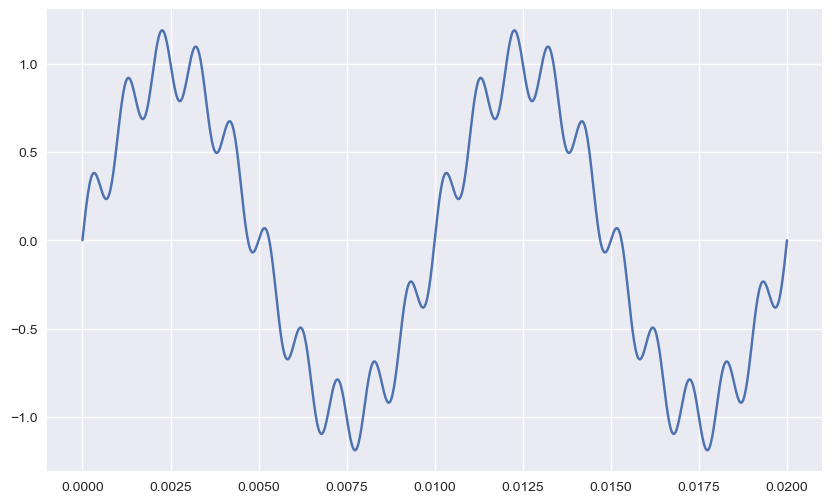

In [6]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 1e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 0.2
f2 = 1e3
y2 = A2 * np.sin(2 * np.pi * f2 * t)

plt.plot(t, y1 + y2);

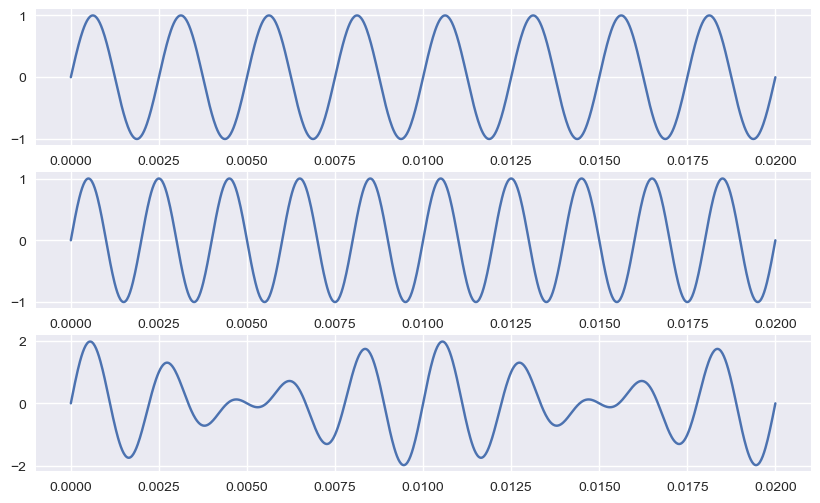

In [7]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 4e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 1
f2 = 5e2
y2 = A2 * np.sin(2 * np.pi * f2 * t)

fig, ax = plt.subplots(3);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y1 + y2);

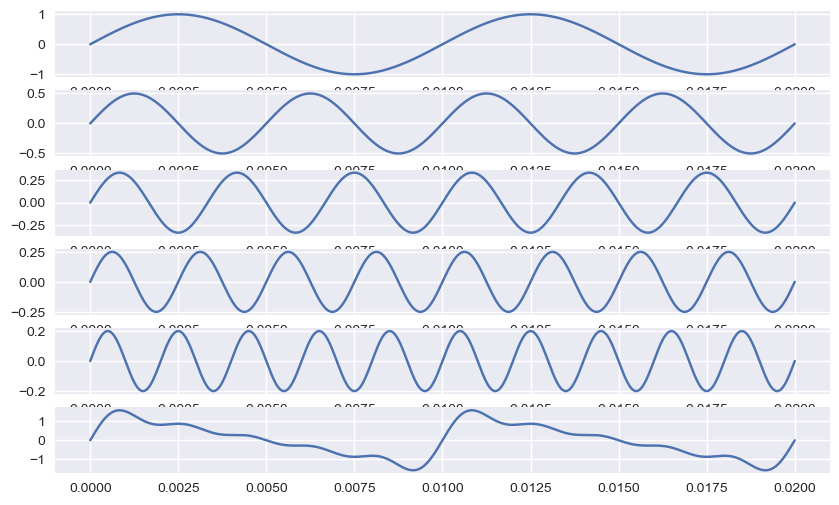

In [8]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 1e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)

A2 = 0.5
f2 = 2e2
y2 = A2 * np.sin(2 * np.pi * f2 * t)

A3 = 0.33
f3 = 3e2
y3 = A3 * np.sin(2 * np.pi * f3 * t)

A4 = 0.25
f4 = 4e2
y4 = A4 * np.sin(2 * np.pi * f4 * t)

A5 = 0.2
f5 = 5e2
y5 = A5 * np.sin(2 * np.pi * f5 * t)

fig, ax = plt.subplots(6);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y3)
ax[3].plot(t, y4)
ax[4].plot(t, y5)
ax[5].plot(t, y1 + y2 + y3 + y4 + y5);

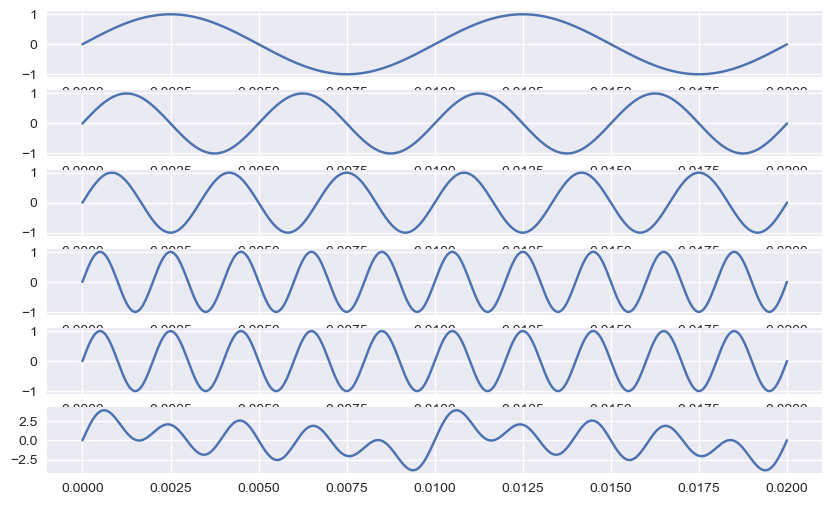

In [9]:
t = np.linspace(0, 0.02, 1001)

A1 = 1
f1 = 1e2
f2 = 2e2
f3 = 3e2
f4 = 4e2
f5 = 5e2
y1 = A1 * np.sin(2 * np.pi * f1 * t)
y2 = A1 * np.sin(2 * np.pi * f2 * t)
y3 = A1 * np.sin(2 * np.pi * f3 * t)
y4 = A1 * np.sin(2 * np.pi * f5 * t)
y5 = A1 * np.sin(2 * np.pi * f5 * t)
fig, ax = plt.subplots(6);
ax[0].plot(t, y1)
ax[1].plot(t, y2)
ax[2].plot(t, y3)
ax[3].plot(t, y4)
ax[4].plot(t, y5)
ax[5].plot(t, y1 + y2 + y3 + y4 + y5);

---

## Speech Sounds

Consonants
* Where in the vocal tract does the articulation take place? place of articulation
  * Lips: (bi)labial
  * Teeth: dental
  * Tongue against upper gums: alveolar
  * Tongue against palate: palatal
* Is breath involved? Pulmonic vs Non Pulmonic; phonation
* When breath is involved, how is it manipulated? manner of articulation
  * single burst of air: plosive
  * air passes through the nasal cavity: nasal
  * short, speedy bursts of air: trill
  * hard narrowing of air passage: fricative
  * hard narrowing of air passage around tongue: lateral fricative
  * soft narrowing of air passage: approximant
  * soft narrowing of air passag around tongue: lateral approximant

consonants
* [Alveolar Click](https://en.wikipedia.org/wiki/Alveolar_click)
* [Bilabial Click](https://en.wikipedia.org/wiki/Bilabial_click)
* [Dental Click](https://en.wikipedia.org/wiki/Dental_click)
* [Epiglottal Plosive](https://en.wikipedia.org/wiki/Epiglottal_plosive)
* [Glottal Stop](https://en.wikipedia.org/wiki/Glottal_stop)
* [Lateral Click](https://en.wikipedia.org/wiki/Lateral_click)
* [Velar Click](https://en.wikipedia.org/wiki/Back-released_velar_click)
* [Velopharyngeal Fricative](https://en.wikipedia.org/wiki/Velopharyngeal_consonant)
* [Voiced Alveolar Affricate](https://en.wikipedia.org/wiki/Voiced_alveolar_affricate)
* [Voiced Alveolar Approximant](https://en.wikipedia.org/wiki/Voiced_alveolar_and_postalveolar_approximants)
* [Voiced Alveolar Fricative](https://en.wikipedia.org/wiki/Voiced_alveolar_fricative)
* [Voiced Alveolar Implosive](https://en.wikipedia.org/wiki/Voiced_alveolar_implosive)
* [Voiced Alveolar Lateral Approximant](https://en.wikipedia.org/wiki/Voiced_dental,_alveolar_and_postalveolar_lateral_approximants)
* [Voiced Alveolar Lateral Flap](https://en.wikipedia.org/wiki/Voiced_dental_and_alveolar_lateral_flaps)
* [Voiced Alveolar Lateral Fricative](https://en.wikipedia.org/wiki/Voiced_dental_and_alveolar_lateral_fricatives)
* [Voiced Alveolar Tap](https://en.wikipedia.org/wiki/Voiced_dental_and_alveolar_taps_and_flaps)
* [Voiced Alveolar Trill](https://en.wikipedia.org/wiki/Voiced_dental,_alveolar_and_postalveolar_trills#Voiced_alveolar_trill)
* [Voiced Alveopalatal Affricate](https://en.wikipedia.org/wiki/Voiced_alveolo-palatal_affricate)
* [Voiced Alveopalatal Fricative](https://en.wikipedia.org/wiki/Voiced_alveolo-palatal_fricative)
* [Voiced Bilabial Implosive](https://en.wikipedia.org/wiki/Voiced_bilabial_implosive)
* [Voiced Bilabial Trill](https://en.wikipedia.org/wiki/Voiced_bilabial_trill)
* [Voiced Epiglottal Fricative/Trill](https://en.wikipedia.org/wiki/Voiced_epiglottal_trill)
* [Voiced Glottal Fricative](https://en.wikipedia.org/wiki/Voiced_glottal_fricative)
* [Voiced Labiodental Approximant](https://en.wikipedia.org/wiki/Voiced_labiodental_approximant)
* [Voiced Labiodental Nasal](https://en.wikipedia.org/wiki/Voiced_labiodental_nasal)
* [Voiced Labiopalatal Approximant](https://en.wikipedia.org/wiki/Voiced_labial%E2%80%93palatal_approximant)
* [Voiced Palatal Fricative](https://en.wikipedia.org/wiki/Voiced_palatal_fricative)
* [Voiced Palatal Implosive](https://en.wikipedia.org/wiki/Voiced_palatal_implosive)
* [Voiced Palatal Lateral Approximant](https://en.wikipedia.org/wiki/Voiced_palatal_lateral_approximant)
* [Voiced Palatal Nasal](https://en.wikipedia.org/wiki/Voiced_palatal_nasal)
* [Voiced Palatal Plosive](https://en.wikipedia.org/wiki/Voiced_palatal_plosive)
* [Voiced Pharyngeal Fricative](https://en.wikipedia.org/wiki/Voiced_pharyngeal_fricative)
* [Voiced Postalveolar Affricate](https://en.wikipedia.org/wiki/Voiced_postalveolar_affricate)
* [Voiced Postalveolar Fricative](https://en.wikipedia.org/wiki/Voiced_postalveolar_fricative)
* [Voiced Retroflex Approximant](https://en.wikipedia.org/wiki/Voiced_retroflex_approximant)
* [Voiced Retroflex Flap](https://en.wikipedia.org/wiki/Voiced_retroflex_flap)
* [Voiced Retroflex Fricative](https://en.wikipedia.org/wiki/Voiced_retroflex_fricative)
* [Voiced Retroflex Lateral Approximant](https://en.wikipedia.org/wiki/Voiced_retroflex_lateral_approximant)
* [Voiced Retroflex Nasal](https://en.wikipedia.org/wiki/Voiced_retroflex_nasal)
* [Voiced Retroflex Plosive](https://en.wikipedia.org/wiki/Voiced_retroflex_plosive)
* [Voiced Uvular Fricative](https://en.wikipedia.org/wiki/Voiced_uvular_fricative)
* [Voiced Uvular Implosive](https://en.wikipedia.org/wiki/Voiced_uvular_implosive)
* [Voiced Uvular Nasal](https://en.wikipedia.org/wiki/Voiced_uvular_nasal)
* [Voiced Uvular Plosive](https://en.wikipedia.org/wiki/Voiced_uvular_plosive)
* [Voiced Uvular Trill](https://en.wikipedia.org/wiki/Voiced_uvular_trill)
* [Voiced Velar Approximant](https://en.wikipedia.org/wiki/Voiced_velar_approximant)
* [Voiced Velar Fricative](https://en.wikipedia.org/wiki/Voiced_velar_fricative)
* [Voiced Velar Implosive](https://en.wikipedia.org/wiki/Voiced_velar_implosive)
* [Voiced Velar Lateral Approximant](https://en.wikipedia.org/wiki/Voiced_velar_lateral_approximant)
* [Voiced Velar Plosive](https://en.wikipedia.org/wiki/Voiced_velar_plosive)
* [Voiceless Alveolar Affricate](https://en.wikipedia.org/wiki/Voiceless_alveolar_affricate)
* [Voiceless Alveolar Lateral Fricative](https://en.wikipedia.org/wiki/Voiceless_dental_and_alveolar_lateral_fricatives)
* [Voiceless Alveopalatal Affricate](https://en.wikipedia.org/wiki/Voiceless_alveolo-palatal_affricate)
* [Voiceless Alveopalatal Fricative](https://en.wikipedia.org/wiki/Voiceless_alveolo-palatal_fricative)
* [Voiceless Bilabial Fricative](https://en.wikipedia.org/wiki/Voiceless_bilabial_fricative)
* [Voiceless Epiglottal Fricative/Trill](https://en.wikipedia.org/wiki/Voiceless_epiglottal_trill)
* [Voiceless Labiovelar Fricative](https://en.wikipedia.org/wiki/Voiceless_labial%E2%80%93velar_fricative)
* [Voiceless Postalveolar Affricate](https://en.wikipedia.org/wiki/Voiceless_postalveolar_affricate)
* [Voiceless Postalveolar Fricative](https://en.wikipedia.org/wiki/Voiceless_postalveolar_fricative)
* [Voiceless Retroflex Fricative](https://en.wikipedia.org/wiki/Voiceless_retroflex_fricative)
* [Voiceless Retroflex Plosive](https://en.wikipedia.org/wiki/Voiceless_retroflex_plosive)
* [Voiceless Velar Fricative](https://en.wikipedia.org/wiki/Voiceless_velar_fricative)

Vowels
* Where is the tongue?: front, central/mid, back
* How closed/open is the vocal tract?: closed, near-closed, closed-mid, mid, open-mid, near-open, open
* Are the lips rounded/unrounded?: rounded, unrounded

vowels
* [Close Back Unrounded Vowel](https://en.wikipedia.org/wiki/Close_back_unrounded_vowel)
* [Close Central Rounded Vowel](https://en.wikipedia.org/wiki/Close_central_rounded_vowel)
* [Close Central Unrounded Vowel](https://en.wikipedia.org/wiki/Close_central_unrounded_vowel)
* [Close-Mid Back Unrounded Vowel](https://en.wikipedia.org/wiki/Close-mid_back_unrounded_vowel)
* [Close-Mid Central Rounded Vowel](https://en.wikipedia.org/wiki/Close-mid_central_rounded_vowel)
* [Close-Mid Central Unrounded Vowel](https://en.wikipedia.org/wiki/Close-mid_central_unrounded_vowel)
* [Mid Central Vowel](https://en.wikipedia.org/wiki/Mid_central_vowel)
* [Near-Close Near-Back Rounded Vowel](https://en.wikipedia.org/wiki/Near-close_near-back_rounded_vowel)
* [Near-Close Near-Front Rounded Vowel](https://en.wikipedia.org/wiki/Near-close_near-front_rounded_vowel)
* [Near-Close Near-Front Unrounded Vowel](https://en.wikipedia.org/wiki/Near-close_near-front_unrounded_vowel)
* [Near-Open Central Vowel](https://en.wikipedia.org/wiki/Near-open_central_vowel)
* [Open-Mid Back Rounded Vowel](https://en.wikipedia.org/wiki/Open-mid_back_rounded_vowel)
* [Open-Mid Back Unrounded Vowel](https://en.wikipedia.org/wiki/Open-mid_back_unrounded_vowel)
* [Open-Mid Central Rounded Vowel](https://en.wikipedia.org/wiki/Open-mid_central_rounded_vowel)
* [Open-Mid Central Unrounded Vowel](https://en.wikipedia.org/wiki/Open-mid_central_unrounded_vowel)
* [Open-Mid Front Unrounded Vowel](https://en.wikipedia.org/wiki/Open-mid_front_unrounded_vowel)
* [Open Back Rounded Vowel](https://en.wikipedia.org/wiki/Open_back_rounded_vowel)
* [Open Back Unrounded Vowel](https://en.wikipedia.org/wiki/Open_back_unrounded_vowel)
* [Open Front Rounded Vowel](https://en.wikipedia.org/wiki/Open_front_rounded_vowel)

---

## International Phonetic Alphabet [IPA]

In [100]:
pla = [
  'bilabial',
  'labiodental',
  'dental',
  'alveolar',
  'postalveolar',
  'retroflex',
  'palatal',
  'velar',
  'uvular',
  'pharyngeal',
  'glottal',
]
man = [
  'plosive',
  'nasal',
  'trill',
  'flap/tap',
  'fricative',
  'fricative(lateral)',
  'approximant',
  'approximant(lateral)',
]

ipa = pd.DataFrame(data=[
  ['\u0070','\u0062','','','','','\u0074','\u0064','','','\u0288','\u0256','\u0063','\u025F','\u006B','\u0261','\u0071','\u0262','','','\u0294',''],
  ['','\u006D','','\u0271','','','','\u006E','','','','\u0273','','\u0272','','\u014B','','\u0274','','','',''],
  ['','\u0299','','','','','','\u0072','','','','','','','','','','\u0280','','','',''],
  ['','','','\u2C71','','','','\u027E','','','','\u027D','','','','','','','','','',''],
  ['\u0278','\u03B2','\u0066','\u0076','\u03B8','\u00F0','\u0073','\u007A','\u0283','\u0292','\u0282','\u0290','\u00E7','\u029D','\u0078','\u0263','\u03C7','\u0281','\u0127','\u0295','\u0068','\u0266'],
  ['','','','','','','\u026C','\u026E','','','','','','','','','','','','','',''],
  ['','','','\u028B','','','','\u0279','','','','\u027B','','\u006A','','\u0270','','','','','',''],
  ['','','','','','','','\u006C','','','','\u026D','','\u028E','','\u029F','','','','','',''],
], columns=pd.MultiIndex.from_product([pla, ['u','v']]), index=man)
ipa.style\
  .set_caption('IPA')\
  .set_properties(**{
    'font-size' : '18pt',
  })

In [93]:
ipa.bilabial

,u,v
plosive,p,b
nasal,,m
trill,,ʙ
flap/tap,,
fricative,ɸ,β
fricative(lateral),,
approximant,,
approximant(lateral),,


### IPA Extension (Unicode block)

In [79]:
ipa = [
  'near-open central vowel',
  'open back unrounded vowel',
  'open back rounded vowel',
  'voiced bilabial implosive',
  'open-mid back rounded vowel',
  'voiceless alveopalatal fricative',
  'voiced retroflex plosive',
  'voiced alveolar implosive',
  'close-mid central unrounded vowel',
  'mid central vowel',
  'rhotacized mid central vowel',
  'open-mid front unrounded vowel',
  'open-mid central unrounded vowel',
  'rhotacized open-mid central unrounded vowel',
  'open-mid central rounded vowel',
  'voiced palatal plosive',
  'voiced velar implosive',
  'voiced velar plosive',
  'voiced uvular plosive',
  'voiced velar fricative',
  'close-mid back unrounded vowel',
  'voiced labiopalatal approximant',
  'voiced glottal fricative',
  'sj sound',
  'close central unrounded vowel',
  '(obsolete)',
  'near-close near-front unrounded vowel',
  'voiced alveolar lateral approximant',
  'voiceless alveolar lateral fricative',
  'voiced retroflex lateral approximant',
  'voiced alveolar lateral fricative',
  'close back unrounded vowel',
  'voiced velar approximant',
  'voiced labiodental nasal',
  'voiced palatal nasal',
  'voiced retroflex nasal',
  'voiced uvular nasal',
  'close-mid central rounded vowel',
  'open front rounded vowel',
  '(obsolete)',
  'voiceless bilabial fricative',
  'voiced alveolar approximant',
  'voiced alveolar lateral flap',
  'voiced retroflex approximant',
  'voiced alveolar trill',
  'voiced retroflex flap',
  'voiced alveolar tap',
  'voiced alveolar fricative',
  'voiced uvular trill',
  'voiced uvular fricative',
  'voiceless retroflex fricative',
  'voiceless postalveolar fricative',
  'voiced palatal implosive',
  'syllabic voiced retroflex fricative',
  'voiceless alveopalatal fricative',
  'dental click',
  'voiceless retroflex plosive',
  'close central rounded vowel',
  'near-close near-back rounded vowel',
  'voiced labiodental approximant',
  'open-mid back unrounded vowel',
  'voiceless labiovelar fricative',
  'voiced palatal lateral approximant',
  'near-close near-front rounded vowel',
  'voiced retroflex fricative',
  'voiced alveopalatal fricative',
  'voiced postalveolar fricative',
  'glottal stop',
  'voiced pharyngeal fricative',
  'alveolar lateral click (obsolete)',
  'postalveolar click (obsolete)',
  'bilabial click',
  'voiced bilabial trill',
  '?',
  'voiced uvular implosive',
  'voiceless epiglottal fricative/trill',
  'voiced palatal fricative',
  'velar click (obsolete)',
  'voiced velar lateral approximant',
  'voiceless uvular implosive (obsolete)',
  'epiglottal plosive',
  'voiced epiglottal fricative/trill',
  'voiced alveolar affricate',
  'voiced postalveolar affricate',
  'voiced alveopalatal affricate',
  'voiceless alveolar affricate',
  'voiceless postalveolar affricate',
  'voiceless alveopalatal affricate',
  'velopharyngeal fricative',
  'voiceless grooved lateral alveolar fricative',
  'voiced grooved lateral alveolar fricative',
  'bilabial percussive',
  'bidental percussive',
  'syllabic labialized voiced alveolar fricative',
  'syllabic labialized voiced retroflex fricative',
]

start  = 0x0250
stop   = 0x02AF
points = [c for c in range(start, stop)]
print(f"{'Glyph':<20}{'Unicode':<20}{'IPA':<50}{'Unicode'}")
for i, point in enumerate(points):
  print(f"{chr(point):<20}{to_codepoint(dec_to_hex(point)):<20}{ipa[i]:<50}{unicodedata.name(chr(point))}")

Glyph               Unicode             IPA                                               Unicode
ɐ                   \U00000250          near-open central vowel                           LATIN SMALL LETTER TURNED A
ɑ                   \U00000251          open back unrounded vowel                         LATIN SMALL LETTER ALPHA
ɒ                   \U00000252          open back rounded vowel                           LATIN SMALL LETTER TURNED ALPHA
ɓ                   \U00000253          voiced bilabial implosive                         LATIN SMALL LETTER B WITH HOOK
ɔ                   \U00000254          open-mid back rounded vowel                       LATIN SMALL LETTER OPEN O
ɕ                   \U00000255          voiceless alveopalatal fricative                  LATIN SMALL LETTER C WITH CURL
ɖ                   \U00000256          voiced retroflex plosive                          LATIN SMALL LETTER D WITH TAIL
ɗ                   \U00000257          voiced alveolar implosive   

---

## Notes

__Articulatory Phonetics__<br>
the study of speech sound production<br>
the energy of the lungs produces an airstream<br>
the larynx modifies the airstream by means of phonation<br>
the vocal tract modulates the airstream by means of the articulators: the glottis, the uvula, the tongue, and the lips<br>
airstream mechanisms:<br>

. | pulmonic | glottalic | velaric
-|-|-|-
egressive | . | . | .
ingressive | . | . | .

segmentals: consonants and vowels<br>
suprasegmentals or prosodic features: stress, loudness, pitch, length, and secondary articulation<br> 

__Auditory Phonetics__<br>
the study of speech sound perception<br>

__Acoustic Phonetics__<br>
the study of speech sound physics<br>

## Physics

__Waveform__<br>
amplitude over time<br>

__Power Spectrum__<br>
amplitude over frequency<br>
the first, lowest-frequency peak is the fundamental frequency of a complex periodic waveform<br>
the remaining, higher-frequency peaks are harmonics (positive integral multiples) of the fundamental frequency<br>

__Frequency__<br>
$$f = \frac{1}{T} \,\text{[cycles per unit time]}$$

__Period__<br>
$$f = \frac{1}{T} \,\text{[unit time]}$$

__Speed of Sound__<br>
the speed of sound in moist, warm air<br>
$$c = 35000 \,\text{cm/s}$$

__Wavelength__<br>
$$
\begin{align}
\lambda &= cT \\
&= \frac{c}{f} \,\text{[unit length]}\\
\end{align}
$$

F$_0 =$ H$_1$ __Fundamental Frequency or First Harmonic__<br>
the frequency of a complex periodic waveform<br>
the first, lowest-frequency peak in the power spectrum of a complex periodic waveform<br>
in acoustic phonetics, F$_0$ is related to the listener's perception of the pitch of the voice<br>

F$_{n - 1} =$ H$_n$ __(N - 1)th Formant or Nth Harmonic__<br>
positive integral multples of F$_0$<br>

__Resonant Frequencies of a tube of length $L$ closed at both ends__<br>
$$
\begin{align}
f_n &= \frac{nc}{2L}
& \text{where}\, n \,\text{is the length of the tube}
\end{align}
$$

__Resonant Frequencies of a tube of length $L$ closed at one end and open at the other end__<br>
$$
\begin{align}
F_n &= \frac{(2n - 1)c}{4(L + 0.4d)}
& \text{where}\, n \,\text{is the length of the tube and}\, d \,\text{is the diameter of the open end of the tube}
\end{align}
$$

__Fourier Analysis__<br>
Fourier analysis of a waveform produces a power spectrum of the waveform<br>


## Source-Filter Theory of Speech Production: An account of speech acoustics

__Source__<br>
Voicing: the vocal folds produce a complex periodic wave as they are repeatedly opened by subglottal pressure and slap shut by the elastic tension of the vocalis muscle: vocal fold vibration is the usual source of sound in vowels<br>

__Filter__<br>
the vocal tract is an acoustic filter that modifies the sound made by the vocal folds<br>

vocal fold vibration produces sound the way a siren does, by modulating an airstream<br>

the components of the voicing spectrum are called harmonics<br>
the amplitude of each harmonic above the second is a little less than the one just below it in frequency<br>
the relative amplitudes of the first and second harmonics are related to phonation type; breathy voicing tends to have a louder first harmonic and softer second harmonic, while in creaky voicing the second harmonic is louder than the first<br>

__Quantal Theory of Speech Acoustics__<br>



Source-Filter Theory
* complex wave with many components, not just a pure sound
* the vocal folds are the source, they produce sound waves
* everything above the glottis is the filter
* we need the filter to distinguish pure vowel sounds (changing the shape of the tongue and other parts of the "filter")

aperiodic
* because white noise or so quick

periodic
* nasal consonants
* voiced fricatives have a periodic component to them

the pitch and the harmonics denote the fundamental frequency

how to change the pitch? muscles pull on the vocal folds, change the length: control the source

---

## Terms

* [Acoustic Resonance](https://en.wikipedia.org/wiki/Acoustic_resonance)
* [Allophone](https://en.wikipedia.org/wiki/Allophone)
* [Alveolar]()
* [Alveolar Click](https://en.wikipedia.org/wiki/Alveolar_click)
* [Alveolar Lateral]()
* [Amplitude](https://en.wikipedia.org/wiki/Amplitude)
* [Approximant]()
* [Articulation](https://en.wikipedia.org/wiki/Articulatory_phonetics)
* [Back Vowel]()
* [Bidental Consonant](https://en.wikipedia.org/wiki/Bidental_consonant)
* [Bilabial Consonant](https://en.wikipedia.org/wiki/Bilabial_consonant)
* [Bilabial Click](https://en.wikipedia.org/wiki/Bilabial_click)
* [Central Vowel]()
* [Click]()
* [Close Back Unrounded Vowel](https://en.wikipedia.org/wiki/Close_back_unrounded_vowel)
* [Close Central Rounded Vowel](https://en.wikipedia.org/wiki/Close_central_rounded_vowel)
* [Close Central Unrounded Vowel](https://en.wikipedia.org/wiki/Close_central_unrounded_vowel)
* [Close-Mid Back Unrounded Vowel](https://en.wikipedia.org/wiki/Close-mid_back_unrounded_vowel)
* [Close-Mid Central Rounded Vowel](https://en.wikipedia.org/wiki/Close-mid_central_rounded_vowel)
* [Close-Mid Central Unrounded Vowel](https://en.wikipedia.org/wiki/Close-mid_central_unrounded_vowel)
* [Closed Vowel]()
* [Coarticulation](https://en.wikipedia.org/wiki/Co-articulated_consonant)
* [Consonant]()
* [Dental]()
* [Dental Click](https://en.wikipedia.org/wiki/Dental_click)
* [Diacritic]()
* [Eigenfrequency](https://en.wikipedia.org/wiki/Natural_frequency)
* [Ejective]()
* [End Correction](https://en.wikipedia.org/wiki/End_correction)
* [Epiglottal Plosive](https://en.wikipedia.org/wiki/Epiglottal_plosive)
* [First Harmonic](https://en.wikipedia.org/wiki/Fundamental_frequency)
* [Flap]()
* [Formant](https://en.wikipedia.org/wiki/Formant)
* [Fourier Analysis](https://en.wikipedia.org/wiki/Fourier_analysis)
* [Fourier Transform (FT)](https://en.wikipedia.org/wiki/Fourier_transform)
* [Fricative]()
* [Front Vowel]()
* [Fundamental Frequency (F0/H1)](https://en.wikipedia.org/wiki/Fundamental_frequency)
* [Glottal]()
* [Glottal Stop](https://en.wikipedia.org/wiki/Glottal_stop)
* [Harmonic](https://en.wikipedia.org/wiki/Harmonic)
* [Harmonic, Mathematical](https://en.wikipedia.org/wiki/Harmonic_(mathematics))
* [Harmonic Analysis](https://en.wikipedia.org/wiki/Harmonic_analysis)
* [Harmonic Series](https://en.wikipedia.org/wiki/Harmonic_series_(mathematics))
* [Harmonic Spectrum](https://en.wikipedia.org/wiki/Harmonic_spectrum)
* [Helmholtz Resonator](https://en.wikipedia.org/wiki/Helmholtz_resonance)
* [Human Voice](https://en.wikipedia.org/wiki/Human_voice)
* [Implosive]()
* [International Phonetic Alphabet (IPA)](https://en.wikipedia.org/wiki/International_Phonetic_Alphabet)
* [IPA (Unicode)](https://en.wikipedia.org/wiki/Phonetic_symbols_in_Unicode)
* [IPA Extensions (Unicode block)](https://en.wikipedia.org/wiki/IPA_Extensions)
* [IPA: obsolete](https://en.wikipedia.org/wiki/Obsolete_and_nonstandard_symbols_in_the_International_Phonetic_Alphabet)
* [Labialization](https://en.wikipedia.org/wiki/Labialization)
* [Labiodental]()
* [Lateral Approximant]()
* [Lateral Click](https://en.wikipedia.org/wiki/Lateral_click)
* [Lateral Consonant](https://en.wikipedia.org/wiki/Lateral_consonant)
* [Lateral Fricative]()
* [Liquid]()
* [Manner of Articulation](https://en.wikipedia.org/wiki/Manner_of_articulation)
* [Mid Central Vowel](https://en.wikipedia.org/wiki/Mid_central_vowel)
* [Nasal]()
* [Natural Frequency](https://en.wikipedia.org/wiki/Natural_frequency)
* [Near-Close Near-Back Rounded Vowel](https://en.wikipedia.org/wiki/Near-close_near-back_rounded_vowel)
* [Near-Close Near-Front Rounded Vowel](https://en.wikipedia.org/wiki/Near-close_near-front_rounded_vowel)
* [Near-Close Near-Front Unrounded Vowel](https://en.wikipedia.org/wiki/Near-close_near-front_unrounded_vowel)
* [Near-Open Central Vowel](https://en.wikipedia.org/wiki/Near-open_central_vowel)
* [Nonpulmonic Consonant]()
* [Normal Mode](https://en.wikipedia.org/wiki/Normal_mode)
* [Open Vowel]()
* [Open-Mid Back Rounded Vowel](https://en.wikipedia.org/wiki/Open-mid_back_rounded_vowel)
* [Open-Mid Back Unrounded Vowel](https://en.wikipedia.org/wiki/Open-mid_back_unrounded_vowel)
* [Open-Mid Central Rounded Vowel](https://en.wikipedia.org/wiki/Open-mid_central_rounded_vowel)
* [Open-Mid Central Unrounded Vowel](https://en.wikipedia.org/wiki/Open-mid_central_unrounded_vowel)
* [Open-Mid Front Unrounded Vowel](https://en.wikipedia.org/wiki/Open-mid_front_unrounded_vowel)
* [Open Back Rounded Vowel](https://en.wikipedia.org/wiki/Open_back_rounded_vowel)
* [Open Back Unrounded Vowel](https://en.wikipedia.org/wiki/Open_back_unrounded_vowel)
* [Open Front Rounded Vowel](https://en.wikipedia.org/wiki/Open_front_rounded_vowel)
* [Palatal]()
* [Palatoalveolar]()
* [Part of Speech](https://en.wikipedia.org/wiki/Part_of_speech)
* [Pharyngeal]()
* [Pharyngealization](https://en.wikipedia.org/wiki/Pharyngealization)
* [Phonation](https://en.wikipedia.org/wiki/Phonation)
* [Phone](https://en.wikipedia.org/wiki/Phone_(phonetics))
* [Phoneme](https://en.wikipedia.org/wiki/Phoneme)
* [Phonetics](https://en.wikipedia.org/wiki/Phonetics)
* [Phonetics, Acoustic](https://en.wikipedia.org/wiki/Acoustic_phonetics)
* [Phonetics, Articulatory](https://en.wikipedia.org/wiki/Articulatory_phonetics)
* [Phonetics, Auditory](https://en.wikipedia.org/wiki/Auditory_phonetics)
* [Phonogram](https://en.wikipedia.org/wiki/Phonogram_(linguistics))
* [Phonograph](https://en.wikipedia.org/wiki/Phonogram_(linguistics))
* [Phonology](https://en.wikipedia.org/wiki/Phonology)
* [Pitch](https://en.wikipedia.org/wiki/Pitch_(music))
* [Pitch Detection Algorithm (PDA)](https://en.wikipedia.org/wiki/Pitch_detection_algorithm)
* [Plosive]()
* [Postalveolar]()
* [Pulmonic Consonant]()
* [R-Colored or Rhotacized Vowel](https://en.wikipedia.org/wiki/R-colored_vowel)
* [Resonance](https://en.wikipedia.org/wiki/Resonance)
* [Resonant Frequency](https://en.wikipedia.org/wiki/Resonance)
* [Resonator](https://en.wikipedia.org/wiki/Resonator)
* [Retroflex]()
* [Rounded Vowel]()
* [Schwa](https://en.wikipedia.org/wiki/Schwa)
* [Secondary Articulation](https://en.wikipedia.org/wiki/Secondary_articulation)
* [Sine Wave](https://en.wikipedia.org/wiki/Sine_wave)
* [Sinusoid](https://en.wikipedia.org/wiki/Sine_wave)
* [Sj Sound](https://en.wikipedia.org/wiki/Sj-sound)
* [Spectrum, Mathematical](https://en.wikipedia.org/wiki/Spectrum_(functional_analysis))
* [Speech Sound](https://en.wikipedia.org/wiki/Phone_(phonetics))
* [Square Wave](https://en.wikipedia.org/wiki/Square_wave)
* [Syllabic Consonant](https://en.wikipedia.org/wiki/Syllabic_consonant)
* [Tap]()
* [Trill]()
* [Unrounded Vowel]()
* [Uvular]()
* [Velar]()
* [Velar Click](https://en.wikipedia.org/wiki/Back-released_velar_click)
* [Velarization](https://en.wikipedia.org/wiki/Velarization)
* [Velopharyngeal Fricative](https://en.wikipedia.org/wiki/Velopharyngeal_consonant)
* [Vocalic Consonant](https://en.wikipedia.org/wiki/Syllabic_consonant)
* [Voice Frequency](https://en.wikipedia.org/wiki/Voice_frequency)
* [Voiced Alveolar Approximant](https://en.wikipedia.org/wiki/Voiced_alveolar_and_postalveolar_approximants)
* [Voiced Alveolar Fricative](https://en.wikipedia.org/wiki/Voiced_alveolar_fricative)
* [Voiced Alveolar Implosive](https://en.wikipedia.org/wiki/Voiced_alveolar_implosive)
* [Voiced Alveolar Lateral Approximant](https://en.wikipedia.org/wiki/Voiced_dental,_alveolar_and_postalveolar_lateral_approximants)
* [Voiced Alveolar Lateral Flap](https://en.wikipedia.org/wiki/Voiced_dental_and_alveolar_lateral_flaps)
* [Voiced Alveolar Lateral Fricative](https://en.wikipedia.org/wiki/Voiced_dental_and_alveolar_lateral_fricatives)
* [Voiced Alveolar Tap](https://en.wikipedia.org/wiki/Voiced_dental_and_alveolar_taps_and_flaps)
* [Voiced Alveolar Trill](https://en.wikipedia.org/wiki/Voiced_dental,_alveolar_and_postalveolar_trills#Voiced_alveolar_trill)
* [Voiced Alveopalatal Affricate](https://en.wikipedia.org/wiki/Voiced_alveolo-palatal_affricate)
* [Voiced Alveopalatal Fricative](https://en.wikipedia.org/wiki/Voiced_alveolo-palatal_fricative)
* [Voiced Bilabial Implosive](https://en.wikipedia.org/wiki/Voiced_bilabial_implosive)
* [Voiced Bilabial Trill](https://en.wikipedia.org/wiki/Voiced_bilabial_trill)
* [Voiced Consonant]()
* [Voiced Epiglottal Fricative/Trill](https://en.wikipedia.org/wiki/Voiced_epiglottal_trill)
* [Voiced Glottal Fricative](https://en.wikipedia.org/wiki/Voiced_glottal_fricative)
* [Voiced Labiodental Approximant](https://en.wikipedia.org/wiki/Voiced_labiodental_approximant)
* [Voiced Labiodental Nasal](https://en.wikipedia.org/wiki/Voiced_labiodental_nasal)
* [Voiced Labiopalatal Approximant](https://en.wikipedia.org/wiki/Voiced_labial%E2%80%93palatal_approximant)
* [Voiced Palatal Fricative](https://en.wikipedia.org/wiki/Voiced_palatal_fricative)
* [Voiced Palatal Implosive](https://en.wikipedia.org/wiki/Voiced_palatal_implosive)
* [Voiced Palatal Lateral Approximant](https://en.wikipedia.org/wiki/Voiced_palatal_lateral_approximant)
* [Voiced Palatal Nasal](https://en.wikipedia.org/wiki/Voiced_palatal_nasal)
* [Voiced Palatal Plosive](https://en.wikipedia.org/wiki/Voiced_palatal_plosive)
* [Voiced Pharyngeal Fricative](https://en.wikipedia.org/wiki/Voiced_pharyngeal_fricative)
* [Voiced Postalveolar Affricate](https://en.wikipedia.org/wiki/Voiced_postalveolar_affricate)
* [Voiced Postalveolar Fricative](https://en.wikipedia.org/wiki/Voiced_postalveolar_fricative)
* [Voiced Retroflex Approximant](https://en.wikipedia.org/wiki/Voiced_retroflex_approximant)
* [Voiced Retroflex Flap](https://en.wikipedia.org/wiki/Voiced_retroflex_flap)
* [Voiced Retroflex Fricative](https://en.wikipedia.org/wiki/Voiced_retroflex_fricative)
* [Voiced Retroflex Lateral Approximant](https://en.wikipedia.org/wiki/Voiced_retroflex_lateral_approximant)
* [Voiced Retroflex Nasal](https://en.wikipedia.org/wiki/Voiced_retroflex_nasal)
* [Voiced Retroflex Plosive](https://en.wikipedia.org/wiki/Voiced_retroflex_plosive)
* [Voiced Uvular Fricative](https://en.wikipedia.org/wiki/Voiced_uvular_fricative)
* [Voiced Uvular Implosive](https://en.wikipedia.org/wiki/Voiced_uvular_implosive)
* [Voiced Uvular Nasal](https://en.wikipedia.org/wiki/Voiced_uvular_nasal)
* [Voiced Uvular Plosive](https://en.wikipedia.org/wiki/Voiced_uvular_plosive)
* [Voiced Uvular Trill](https://en.wikipedia.org/wiki/Voiced_uvular_trill)
* [Voiced Velar Approximant](https://en.wikipedia.org/wiki/Voiced_velar_approximant)
* [Voiced Velar Fricative](https://en.wikipedia.org/wiki/Voiced_velar_fricative)
* [Voiced Velar Implosive](https://en.wikipedia.org/wiki/Voiced_velar_implosive)
* [Voiced Velar Lateral Approximant](https://en.wikipedia.org/wiki/Voiced_velar_lateral_approximant)
* [Voiced Velar Plosive](https://en.wikipedia.org/wiki/Voiced_velar_plosive)
* [Voiceless Alveolar Affricate](https://en.wikipedia.org/wiki/Voiceless_alveolar_affricate)
* [Voiceless Alveolar Lateral Fricative](https://en.wikipedia.org/wiki/Voiceless_dental_and_alveolar_lateral_fricatives)
* [Voiceless Alveopalatal Affricate](https://en.wikipedia.org/wiki/Voiceless_alveolo-palatal_affricate)
* [Voiceless Alveopalatal Fricative](https://en.wikipedia.org/wiki/Voiceless_alveolo-palatal_fricative)
* [Voiceless Bilabial Fricative](https://en.wikipedia.org/wiki/Voiceless_bilabial_fricative)
* [Voiceless Consonant]()
* [Voiceless Epiglottal Fricative/Trill](https://en.wikipedia.org/wiki/Voiceless_epiglottal_trill)
* [Voiceless Labiovelar Fricative](https://en.wikipedia.org/wiki/Voiceless_labial%E2%80%93velar_fricative)
* [Voiceless Postalveolar Affricate](https://en.wikipedia.org/wiki/Voiceless_postalveolar_affricate)
* [Voiceless Postalveolar Fricative](https://en.wikipedia.org/wiki/Voiceless_postalveolar_fricative)
* [Voiceless Retroflex Fricative](https://en.wikipedia.org/wiki/Voiceless_retroflex_fricative)
* [Voiceless Retroflex Plosive](https://en.wikipedia.org/wiki/Voiceless_retroflex_plosive)
* [Voiceless Velar Fricative](https://en.wikipedia.org/wiki/Voiceless_velar_fricative)
* [Vowel]()
* [Waveform](https://en.wikipedia.org/wiki/Waveform)

---

## Figures

Von Helmholtz, Hermann (1821-1894) [Wiki](https://en.wikipedia.org/wiki/Hermann_von_Helmholtz)

---

## Resources

* [Alvin Chen](https://alvinntnu.github.io/python-notes/intro.html)
* Guilherme D. Garcia
  * [Automating Praat experiments](https://gdgarcia.ca/praatexperiment)
  * [Data visualization and analysis](https://gdgarcia.ca/dvaslr.html)
  * [Plotting vowels in R](https://gdgarcia.ca/vowels.html)
* [Kristopher Kyle](https://kristopherkyle.github.io/professional-webpage/docs/tutorials)
* [Pitt's LING1330 Introduction to Computational Linguistics](https://sites.pitt.edu/~naraehan/ling1330/index.html)
* [Praat](https://www.fon.hum.uva.nl/praat/)
* [R](https://www.r-project.org/about.html)
  * [The R Manuals](https://cran.r-project.org/manuals.html)
  * IRkernel [Home](https://irkernel.github.io) [GitHub](https://github.com/IRkernel/IRkernel)
  * [Using R with Anaconda](https://docs.anaconda.com/anaconda/user-guide/tasks/using-r-language/)
* The Virtual Linguistics Campus [YouTube](https://www.youtube.com/channel/UCaMpov1PPVXGcKYgwHjXB3g)

---